## Purpose: extract and plot a by-region summary of depth profiles of any given model variable


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


##### available variables, for reference


ptrc - ['deptht_bounds',
 'Alkalini',
 'time_centered_bounds',
 'time_counter_bounds',
 'O2',
 'DIC',
 'PIIC',
 'NO3',
 'Si',
 'PO4',
 'Fer',
 'DOC',
 'CaCO3',
 'ARA',
 'POC',
 'GOC',
 'BAC',
 'PRO',
 'PTE',
 'MES',
 'GEL',
 'MAC',
 'DIA',
 'MIX',
 'COC',
 'PIC',
 'PHA',
 'FIX',
 'C11',
 'B14B',
 'C14B',
 'D14B']
 
 diad - ['deptht_bounds',
 'DOCTRP',
 'time_centered_bounds',
 'time_counter_bounds',
 'EXP',
 'GRAMIC',
 'GRAMES',
 'GRAMAC',
 'PPTDOC',
 'PPT',
 'TChl',
 'Detrit',
 'Carniv',
 'Herbiv',
 'GRAMICPHY',
 'GRAMESPHY',
 'GRAMACPHY',
 'nitrfix',
 'denitr',
 'DELO2',
 'vsink',
 'sinksil',
 'discarb',
 'ExpCO3',
 'ExpARA',
 'GRAGEL',
 'GRAPTE',
 'proara',
 'prococ',
 'D14PRO',
 'D14RES',
 'fdecay',
 'bdecay',
 'ddecay',
 'qtrC14b',
 'qtrB14b',
 'qtrD14b',
 'qintC14b',
 'Cflx',
 'PICflx',
 'Oflx',
 'dpCO2',
 'pCO2',
 'PPINT']

grid_T - ['deptht_bounds',
 'e3t',
 'time_centered_bounds',
 'time_counter_bounds',
 'votemper',
 'vosaline',
 'tos',
 'sos',
 'zos',
 'mldkz5',
 'mldr10_1',
 'somxl030',
 'wfo',
 'rsntds',
 'tohfls',
 'sosflxdo',
 'taum',
 'sowindsp',
 'soprecip',
 'sbt']

# define model/variable/etc in code cell below

### model data:
- model, years to extract, file pattern, variable name, directory,

### choices about script:
- bottom of depth profile for plotting, are we saving depth profiles, are we saving summary figure

In [2]:
tr = 'TOM12_RW_3G07' #model
ys = 1955; ye = 1960 # years
dtype = 'diad' # filetype
vname = 'TChl' # varname
baseDir = '/gpfs/data/greenocean/software/runs/' #directory where model found
botofdepthprofile = -600
saveDPs = True
saveSummaryFig = True

- import relevant packages

In [3]:
import numpy as np
from cmocean import cm
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import glob


plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


Define and plot subregions and create numerical mask for analysis, calculate grid masks, etc

In [5]:
plothorse = True

Text(0.5, 0.98, 'colours assigned')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


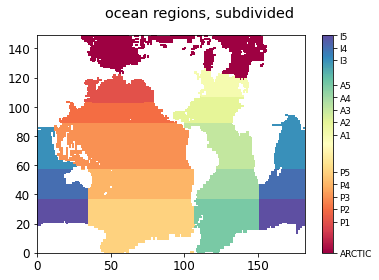

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


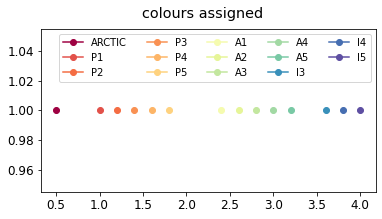

In [6]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan


w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')

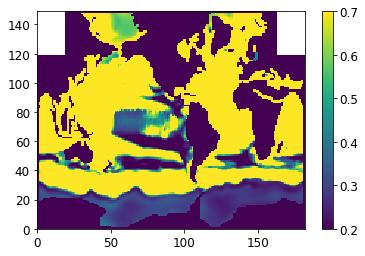

In [7]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
depths = (tmesh['gdept_1d'][0])

ds = xr.open_dataset('/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_LP04/ORCA2_1m_19220101_19221231_diad_T.nc')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] #size in m3

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values #broadcast area 
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:] # multiply by e3t and size, volume in m3

plt.figure()
w=plt.pcolormesh(ds['lim3fe_dia'][0,0,:,:], vmin = 0.2, vmax = 0.7)
plt.colorbar(w)


In [8]:
# look at volume of cells 
# w = plt.pcolormesh(cvol[27,:,:])
# plt.colorbar(w)

- open dataset from list of file names with xarray (made using yearlist function)

In [9]:
# ## yearlist
# def make_yearlist(yrst, yrend, dtype, tr, baseDir):
#     yrs = np.arange(yrst,yrend+1,1)
#     ylist = []
#     for i in range(0,len(yrs)):
#         ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
#         t2 = glob.glob(ty)
#         #print(t2)
#         ylist.append(t2[0])
#     return ylist

['deptht_bounds', 'DOCTRP', 'time_centered_bounds', 'time_counter_bounds', 'CARBTRP', 'CAPITRP', 'ALKTRP', 'EXP', 'GRAMIC', 'GRAMES', 'GRAMAC', 'PPTDOC', 'PPT', 'TChl', 'Detrit', 'Carniv', 'Herbiv', 'GRAMICPHY', 'GRAPTEPHY', 'GRAMESPHY', 'GRAGELPHY', 'GRAMACPHY', 'nitrfix', 'denitr', 'DELO2', 'vsink', 'sinksil', 'discarb', 'ExpCO3', 'ExpARA', 'GRAGEL', 'GRAPTE', 'proara', 'prococ', 'lim2mmfe_dia', 'lim2mmfe_mix', 'lim2mmfe_coc', 'lim2mmfe_pic', 'lim2mmfe_pha', 'lim2mmfe_fix', 'lim3fe_dia', 'lim3fe_mix', 'lim3fe_coc', 'lim3fe_pic', 'lim3fe_pha', 'lim3fe_fix', 'lim4po4_dia', 'lim4po4_mix', 'lim4po4_coc', 'lim4po4_pic', 'lim4po4_pha', 'lim4po4_fix', 'lim5si_dia', 'lim6din_dia', 'lim6din_mix', 'lim6din_coc', 'lim6din_pic', 'lim6din_pha', 'lim6din_fix', 'lim8light_dia', 'lim8light_mix', 'lim8light_coc', 'lim8light_pic', 'lim8light_pha', 'lim8light_fix', 'Cflx', 'PICflx', 'Oflx', 'dpCO2', 'pCO2', 'PPINT']
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


<Figure size 432x288 with 0 Axes>

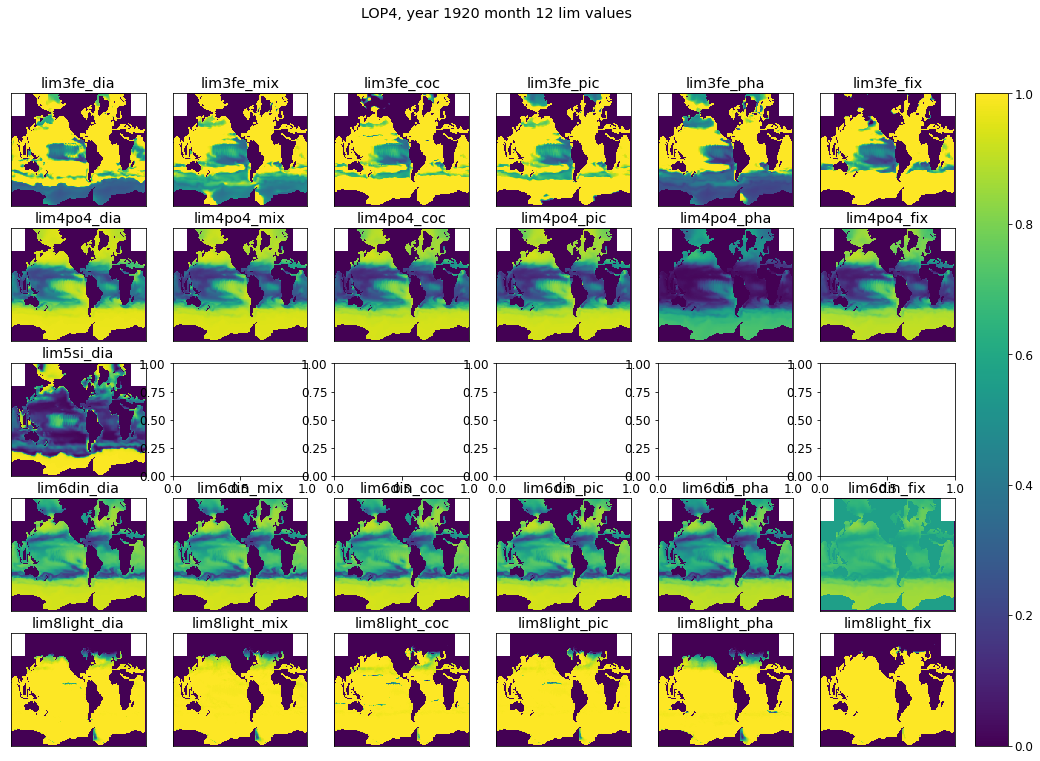

In [23]:
yr = 1920
m = 12
ds = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_LC00/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')
print(list(ds.data_vars))

lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6_din_', 'lim8_light_']
pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

plt.figure()


fact = 1.5
fig, axs = plt.subplots(5,6, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6din_', 'lim8light_']
pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']

ind = 0
for l in lop:
    for p in pft:
        
        if ((l == 'lim5si_') & (p != 'dia')):
            
            pass
            # ind = ind+i
            # print(ind)
            
        else:
            tvar = (f'{l}{p}')
            im = axs[ind].pcolormesh(ds[tvar][m-1,0,:,:], vmin = 0, vmax = 1)
            axs[ind].set_title(f'{tvar}')
            axs[ind].set_xticks([])
            axs[ind].set_yticks([])
        ind = ind+1
        print(ind)
        
cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.04, pad=0.02)

            
plt.suptitle(f'LOP4, year {yr} month {m} lim values')
# plt.tight_layout()
fig.savefig(f'LP04_{yr}month{m}.png')

In [11]:
# yr = 1923


# for i in range(0,36):
    
#     m = i%12 +1
#     # print(m)
#     y = int(i/12) + 1920
#     print(f'{y} {m}')
#     ds = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_LP04/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')


In [20]:


lop = ['lim3fe_', 'lim4po4_', 'lim5si_', 'lim6_din_', 'lim8_light_']
pft = ['dia', 'mix', 'coc', 'pic', 'pha', 'fix']


def gimme(sy):
    plt.figure()
    m = 12
    fact = 1.5
    fig, axs = plt.subplots(6,6, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    ind = 0
    for i in range(0,36):

        ind = i
        m = i%12 +1
        # print(m)
        y = int(i/12) + sy
        print(f'{y} {m}')
        ds = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_LC00/ORCA2_1m_{y}0101_{y}1231_diad_T.nc')

        im = axs[ind].pcolormesh(ds['lim3fe_dia'][m-1,0,:,:], vmin = 0, vmax = 1)
        axs[ind].set_title(f'{y} {m}')
        axs[ind].set_xticks([])
        axs[ind].set_yticks([])
        print(ind)

    cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.04, pad=0.02)


    plt.suptitle(f'LOP4, lim3fe_dia')

    


1940 1
0
1940 2
1
1940 3
2
1940 4
3
1940 5
4
1940 6
5
1940 7
6
1940 8
7
1940 9
8
1940 10
9
1940 11
10
1940 12
11
1941 1
12
1941 2
13
1941 3
14
1941 4
15
1941 5
16
1941 6
17
1941 7
18
1941 8
19
1941 9
20
1941 10
21
1941 11
22
1941 12
23
1942 1
24
1942 2
25
1942 3
26
1942 4
27
1942 5
28
1942 6
29
1942 7
30
1942 8
31
1942 9
32
1942 10
33
1942 11
34
1942 12
35


<Figure size 432x288 with 0 Axes>

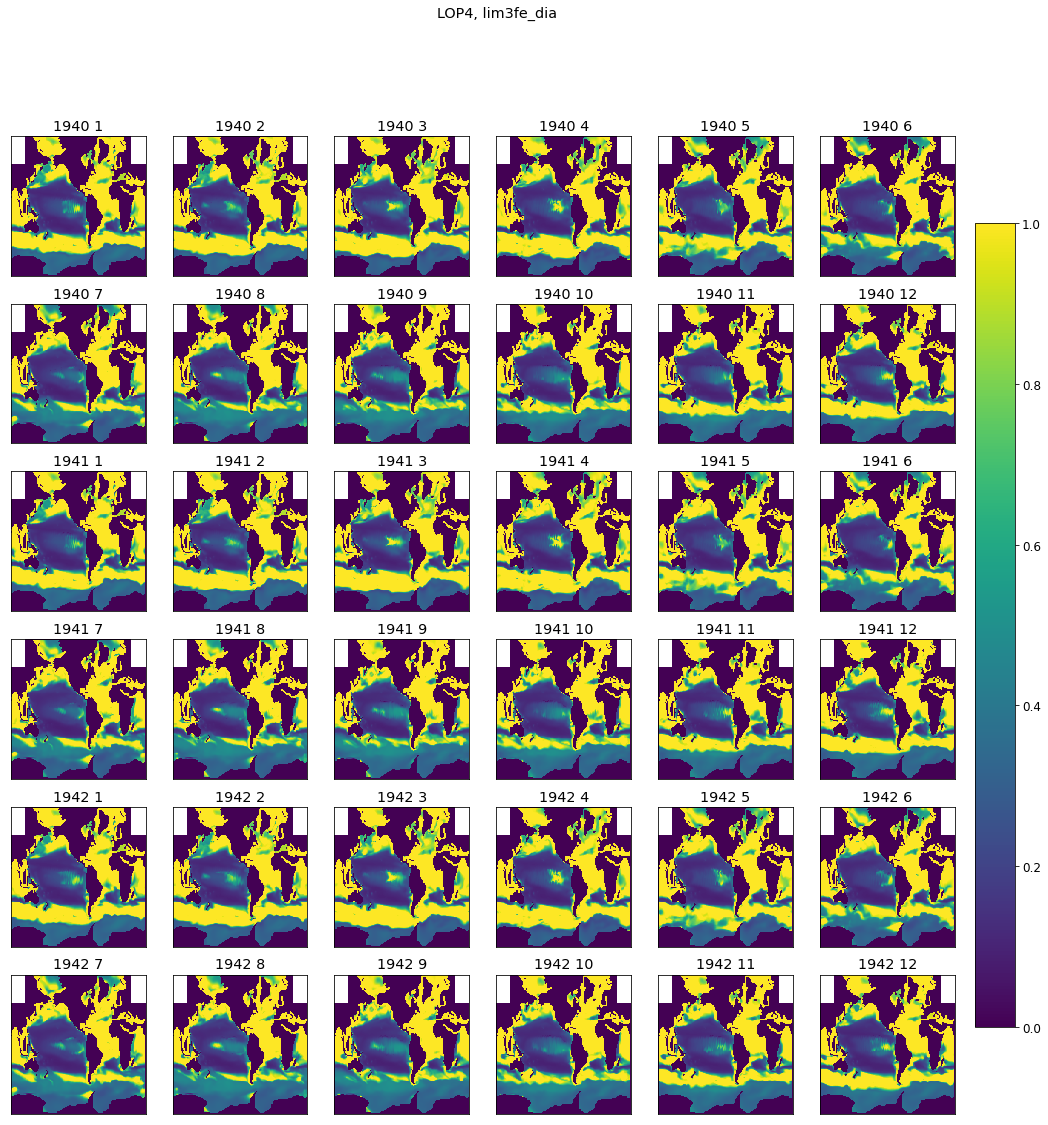

In [22]:
gimme(1940)

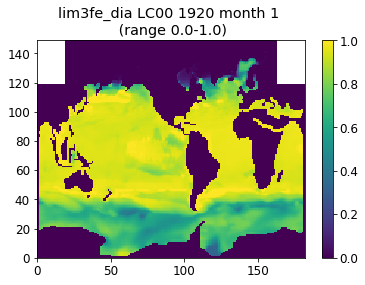

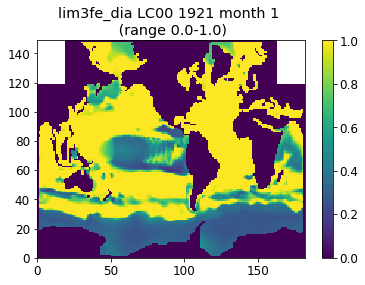

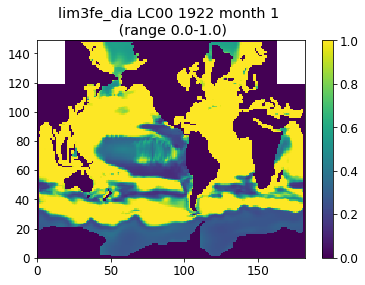

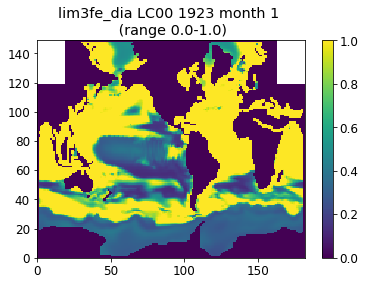

In [19]:
yr = 1920



def qp(yr,tvar,m):
    
    ds = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_LC00/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')
    plt.figure()
    w = plt.pcolormesh(ds[tvar][m-1,0,:,:], vmin =0, vmax = 1)
    tma = np.nanmax(ds[tvar][m-1,0,:,:])
    tmi =  np.nanmin(ds[tvar][m-1,0,:,:])
    plt.colorbar(w)
    plt.title(f'{tvar} LC00 {yr} month {m} \n (range {tmi}-{tma})')
    
    
qp(1920,'lim3fe_dia',1)
qp(1921,'lim3fe_dia',1)
qp(1922,'lim3fe_dia',1)
qp(1923,'lim3fe_dia',1)
# qp('lim3fe_fix',4)
# qp('lim3fe_pic',4)
# qp('lim3fe_mix',4)
# qp('lim3fe_pha',4)

# qp('lim4po4_coc',4)
# qp('lim4po4_dia',4)
# qp('lim4po4_fix',4)

1.0


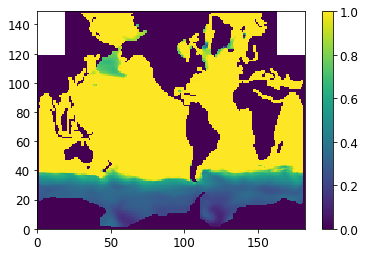

In [14]:
diadf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc')
w = plt.pcolormesh(diadf['lim3dia'][0,0,:,:])
plt.colorbar(w)
print(np.nanmax(diadf['lim3dia'][0,0,:,:]))

['nav_lev', 'adatrj', 'arak0', 'kt', 'ndastp', 'qint_c14', 'rdttrc1', 'TRBAlkalini', 'TRNAlkalini', 'TRBARA', 'TRNARA', 'TRBB14B', 'TRNB14B', 'TRBBAC', 'TRNBAC', 'TRBBFe', 'TRNBFe', 'TRBBSi', 'TRNBSi', 'TRBC11', 'TRNC11', 'TRBC14B', 'TRNC14B', 'TRBCaCO3', 'TRNCaCO3', 'TRBCCHL', 'TRNCCHL', 'TRBCFe', 'TRNCFe', 'TRBCOC', 'TRNCOC', 'TRBD14B', 'TRND14B', 'TRBDCHL', 'TRNDCHL', 'TRBDFe', 'TRNDFe', 'TRBDIA', 'TRNDIA', 'TRBDIC', 'TRNDIC', 'TRBDOC', 'TRNDOC', 'TRBDSi', 'TRNDSi', 'TRBFCHL', 'TRNFCHL', 'TRBFer', 'TRNFer', 'TRBFFe', 'TRNFFe', 'TRBFIX', 'TRNFIX', 'TRBGEL', 'TRNGEL', 'TRBGOC', 'TRNGOC', 'TRBGON', 'TRNGON', 'TRBHCHL', 'TRNHCHL', 'TRBHFe', 'TRNHFe', 'TRBHOC', 'TRNHOC', 'TRBHON', 'TRNHON', 'TRBMAC', 'TRNMAC', 'TRBMES', 'TRNMES', 'TRBMIX', 'TRNMIX', 'TRBNCHL', 'TRNNCHL', 'TRBNFe', 'TRNNFe', 'TRBNO3', 'TRNNO3', 'TRBO2', 'TRNO2', 'TRBPCHL', 'TRNPCHL', 'TRBPFe', 'TRNPFe', 'TRBPHA', 'TRNPHA', 'TRBPIC', 'TRNPIC', 'TRBPIIC', 'TRNPIIC', 'TRBPO4', 'TRNPO4', 'TRBPOC', 'TRNPOC', 'TRBPRO', 'TRNPRO'

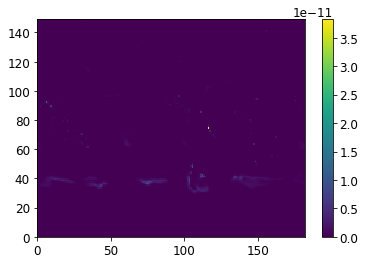

In [15]:
w = xr.open_dataset('/gpfs/home/avd22gnu/scratch/WOA/scripts/restart_19191231_trc_PT.nc')

print(list(w.data_vars))

print(w.TRBSFe)
q = plt.pcolormesh(w['TRNSFe'][0,:,:])
plt.colorbar(q)

In [16]:
regdict['A1']['number']

for i in range
monthly_mean = np.ma.average(monthly_mean[m,0,:,:], weights = cvol[0,:,:]*regmask)

SyntaxError: invalid syntax (3275917102.py, line 3)

In [ ]:


    regmask = np.zeros_like(maskno)
    regmask[maskno == regdict[regs[r]]['number']] = 1
    for i in range(0,31):
        
        yearly_mean_dp[r,i] = np.ma.average(yearly_mean[i,:,:], weights = cvol[i,:,:]*regmask)

    for m in range(0,12):    
        for i in range(0,31):
            monthly_mean_dp[r,m,i] = np.ma.average(monthly_mean[m,i,:,:], weights = cvol[i,:,:]*regmask)

- calculate monthly and yearly mean (whole domain) 
- sanity check: plot yearly mean and monthly mean of surface quantity

In [ ]:
# monthly_mean = tdat.groupby('time_counter.month').mean('time_counter').values#.groupby('time_counter.year').mean()   ## monthly mean for this timeperiod
# yearly_mean = np.nanmean(tdat.resample(time_counter="Y").mean().values, axis = 0)


In [ ]:
# fact = 1    
# fig, axs = plt.subplots(1,1, figsize=(8*fact, 5*fact), facecolor='w', edgecolor='k')
# yearly_mean[yearly_mean == 0] = np.nan
# w = axs.pcolormesh(yearly_mean[0,:,:])
# axs.set_title(f'surface {datnam} (yearly mean) \n {tr} {ys}-{ye}')
# plt.colorbar(w, ax = axs, label = units)

# fact = 2    
# fig, axs = plt.subplots(3,4, figsize=(10*fact, 5*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()
# monthly_mean[monthly_mean == 0] = np.nan
# for i in range(0,12):
#     w = axs[i].pcolormesh(monthly_mean[i,0,:,:])
#     axs[i].set_title(f'month {i+1}')
#     plt.suptitle(f'surface {datnam} (monthly means), {tr} {ys}-{ye}')
#     plt.colorbar(w, ax = axs[i], label = units)

- calculate depth profiles, seasonally and yearly
- both for full globe and by region

In [ ]:
## 0s to nans
yearly_mean[yearly_mean == 0] = np.nan
monthly_mean[monthly_mean == 0] = np.nan
yearly_mean = np.ma.masked_array(yearly_mean, np.isnan(yearly_mean))
monthly_mean = np.ma.masked_array(monthly_mean, np.isnan(monthly_mean))

yearly_mean_dp_fg = np.zeros([31])
monthly_mean_dp_fg = np.zeros([12, 31])
for i in range(0,31):
    yearly_mean_dp_fg[i] = np.ma.average(yearly_mean[i,:,:], weights = cvol[i,:,:])

for m in range(0,12):    
    for i in range(0,31):
        monthly_mean_dp_fg[m,i] = np.ma.average(monthly_mean[m,i,:,:], weights = cvol[i,:,:])
    # ALK_mean[i] = np.ma.average(ALK[i,:,:], weights = cvol[i,:,:]) * 1e6

In [ ]:
## array of region numbers (for later storing in netcdf dataset)
regnos = []

for r in range(0,len(regs)):
    regnos.append(regdict[regs[r]]['number'])
    
regnos = np.array(regnos)

In [ ]:
plothorse = False #are we plotting as we save these depth profiles? (will plot later)


yearly_mean_dp = np.zeros([14, 31])
monthly_mean_dp = np.zeros([14, 12, 31])

tcm = cm.phase
for r in range(0, len(regs)):
    
    regmask = np.zeros_like(maskno)
    regmask[maskno == regdict[regs[r]]['number']] = 1
    for i in range(0,31):
        
        yearly_mean_dp[r,i] = np.ma.average(yearly_mean[i,:,:], weights = cvol[i,:,:]*regmask)

    for m in range(0,12):    
        for i in range(0,31):
            monthly_mean_dp[r,m,i] = np.ma.average(monthly_mean[m,i,:,:], weights = cvol[i,:,:]*regmask)
    
    if plothorse:
        plt.figure()
        plt.plot(yearly_mean_dp[r,:], -depths, color = 'k', linewidth = 2.5)
        for m in range(0,12):
            plt.plot(monthly_mean_dp[r,m,:], -depths, color = tcm(1.*m/12), linewidth = 1, label = f'month {m+1}')
        plt.ylim([-600,0])
        plt.title(regs[r])
        
    


In [ ]:
data_vars = {'yearly_mean':(['regno', 'depth'], yearly_mean_dp,
                         {'units': units,
                          'long_name': datnam}),
             'monthly_mean':(['regno', 'month', 'depth'], monthly_mean_dp,
                         {'units': units,
                          'long_name': datnam}),
             'yearly_mean_fg':(['depth'], yearly_mean_dp_fg,
                         {'units': units,
                          'long_name': datnam}),
             'monthly_mean_fg':(['month', 'depth'], monthly_mean_dp_fg,
                         {'units': units,
                          'long_name': datnam}),
            }

# define coordinates
coords = {'regno': (['regno'], regnos),\
         'month': (['month'], np.arange(1,13,1)),\
         'depth': (['depth'], depths)}

# define global attributes
attrs = {'made in':'github/tjarnikova/AnalysisRobot/depthprofile_template.ipynb',
         'code author':'TJŠJ, T.Jarnikova@uea.ac.uk'
        }
            
# create dataset
ds = xr.Dataset(data_vars=data_vars,
                coords=coords,
                attrs=attrs)

if saveDPs:
    ds.to_netcdf(f'./EXTRACTED/DP/DPsummary_{vname}_{tr}_{ys}-{ye}.nc')

In [ ]:

#define x and y limits 
xl1 = np.nanmin(ds.monthly_mean.values) ; xl2 = np.nanmax(ds.monthly_mean.values)*1.01
yl1 = botofdepthprofile; yl2 = -0
stit = f'{datnam} ({units}): {tr}, {ys}-{ye}'
fit = f'DPsummary_{vname}_{tr}_{ys}-{ye}.jpg'
print(fit)

fact = 1
fig, axs = plt.subplots(4,4, figsize=(16*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



### this bit just plots our background
axs[15].pcolor(maskno, cmap = 'Spectral', vmin = 0.5, vmax = 4)
axs[15].set_xticklabels([])
axs[15].set_yticklabels([])
axs[0].text(xl1+0.35*(xl2-xl1),yl1+0.25*(yl2-yl1),'GLOBAL', color = 'k', fontsize = 16)

# full globe means
for m in range(1,13):
    axs[0].plot(ds.monthly_mean_fg.sel(month = m),-ds.depth,\
              color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')
axs[0].plot(ds.yearly_mean_fg.values,-ds.depth, color = 'k', linewidth = 3, label = 'full year')

#regional means
for i in range(0, len(regs)):
    for m in range(1,13):
        axs[i+1].plot(ds.monthly_mean.sel(regno = regdict[regs[i]]['number'], month = m),-ds.depth,\
                  color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')

    axs[i+1].plot(ds.yearly_mean.sel(regno = regdict[regs[i]]['number']),-ds.depth, color = 'k', linewidth = 3, label = 'full year')


for i in range(0,len(regs)):
    axs[i+1].plot(xl1+0.2*(xl2-xl1),yl1+0.28*(yl2-yl1),marker = "s", color = regdict[regs[i]]['colour'], markersize = 20)
    axs[i+1].text(xl1+0.35*(xl2-xl1),yl1+0.25*(yl2-yl1),regs[i], color = 'k', fontsize = 16)
for i in range(0,len(regs)+1):
    axs[i].set_xlim([xl1, xl2])
    axs[i].set_ylim([yl1,yl2])
    axs[i].grid()
    
###
for i in range(0,len(regs)):
    for m in range(1,13):
        axs[i+1].plot(ds.monthly_mean.sel(regno = regdict[regs[i]]['number'], month = m),-ds.depth,\
                  color = tcm(1.*(m)/13), linewidth = 2, label = f'month {m}')

    axs[i+1].plot(ds.yearly_mean.sel(regno = regdict[regs[i]]['number']),-ds.depth, color = 'k', linewidth = 3, label = 'full year')
    
    

axs[0].legend(fontsize = 10)

plt.suptitle(stit, fontsize = 20, y = 0.98)
plt.tight_layout()

if saveSummaryFig:
    plt.savefig(f'./EXTRACTED/DPfig/{fit}')

In [ ]:
print('compute complete')